In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [249]:
data=pd.read_csv("LGD_DATA.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [250]:
data.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [251]:
data.drop('Ac_No', axis=1, inplace=True)
data.head()

,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,24,5,1,M,Married,203.319595
1,31,10,1,F,Single,402.197302
2,56,37,1,M,Married,553.132096
3,52,31,1,F,Married,292.430579
4,20,3,1,M,Single,246.540576


In [252]:
nulls=data.isnull().sum()
print(nulls)

Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64


In [253]:
data.describe()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15290.000000,15290.000000,15290.000000,15290.000000
mean,42.328254,23.732897,2.495880,389.859718
std,18.280511,17.850707,0.953776,253.729433
min,16.000000,0.000000,1.000000,12.534521
25%,24.000000,6.000000,2.000000,226.434217
50%,42.000000,23.000000,2.000000,354.937874
75%,61.000000,42.000000,3.000000,488.676927
max,70.000000,53.000000,4.000000,3500.000000


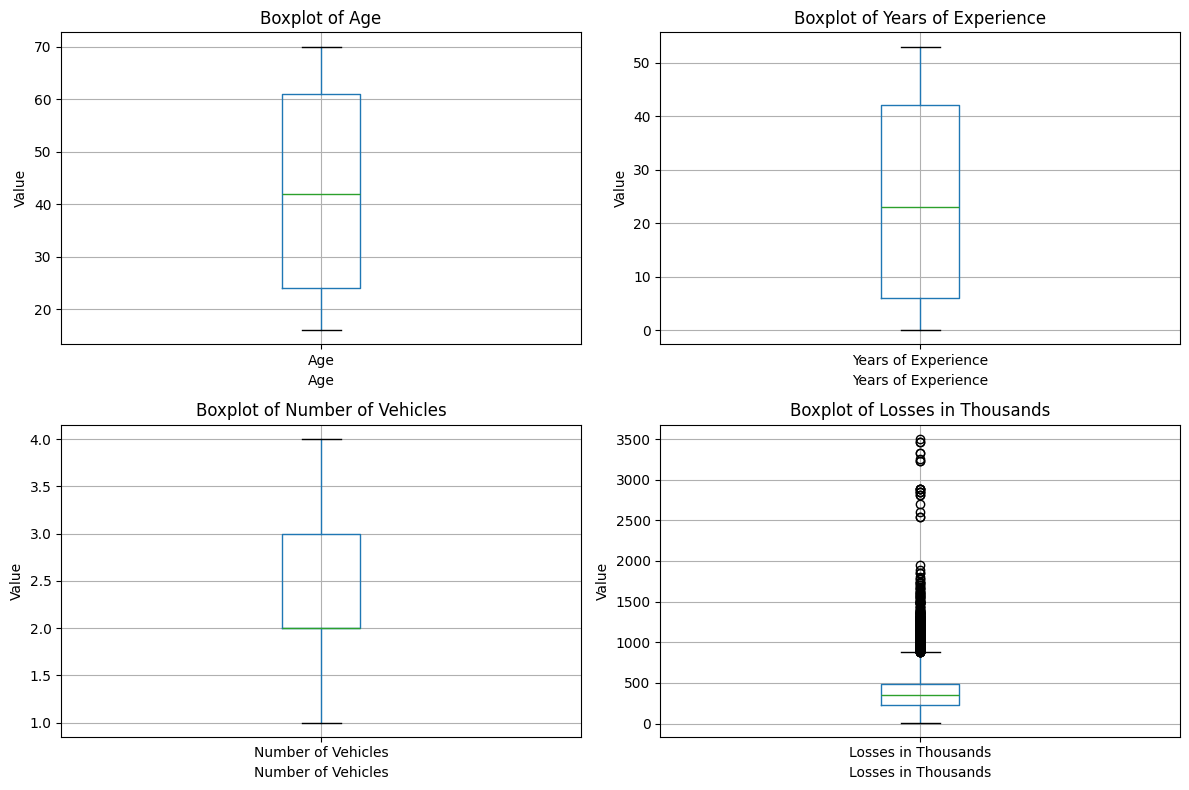

In [254]:
numericCols=data[["Age", "Years of Experience", "Number of Vehicles", "Losses in Thousands"]]
# Set up a grid of plots with 2 rows and 2 columns (can adjust as needed)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Flatten the axes array for easier iteration
flat_axes = axes.flatten()

# Iterate through the columns and their corresponding axes to plot the boxplots
for i, col in enumerate(numericCols):
    data.boxplot(column=col, ax=flat_axes[i])
    flat_axes[i].set_title(f'Boxplot of {col}')
    flat_axes[i].set_xlabel(col)
    flat_axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()



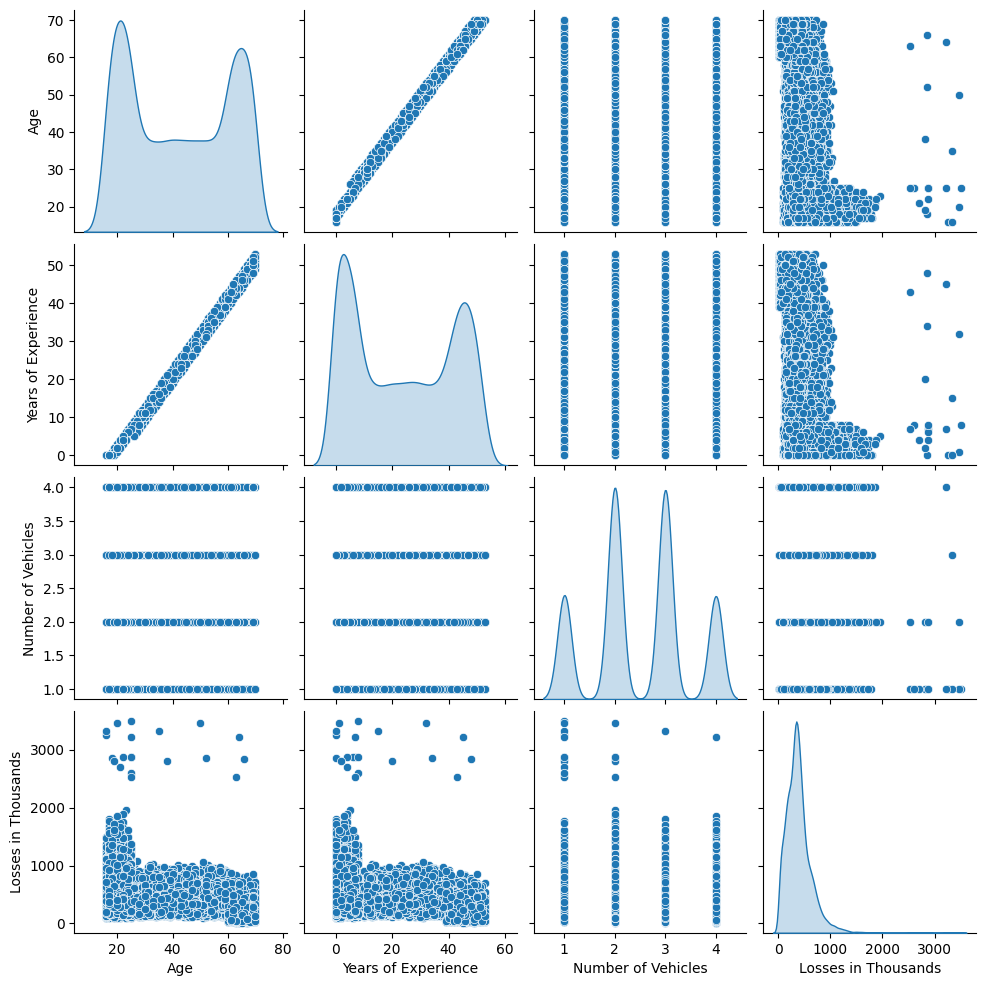

In [255]:
# Create a pairplot
sns.pairplot(data,diag_kind='kde')

# Show the plot
plt.show()

## Examiing the cause of the outliers on losses

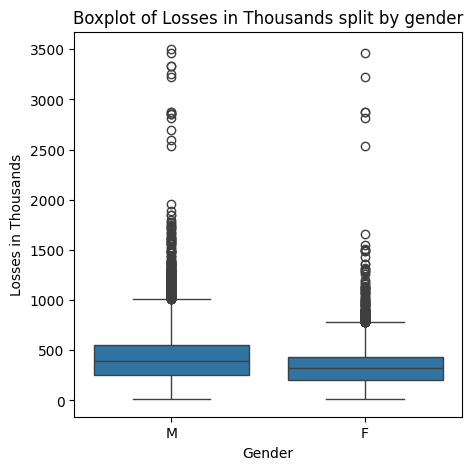

In [256]:
# Gender  , Married  

plt.figure(figsize=(5, 5))
sns.boxplot(x="Gender",y="Losses in Thousands",data=data)
plt.title("Boxplot of Losses in Thousands split by gender")
plt.show()

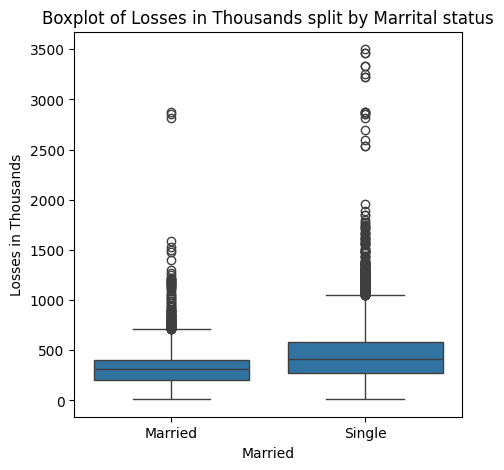

In [257]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Married",y="Losses in Thousands",data=data)
plt.title("Boxplot of Losses in Thousands split by Marrital status")
plt.show()

In [258]:
#the loss in thousands column is skewed to the right. Skews can be handled using log
data['Losses in Thousands'] = np.log(data['Losses in Thousands'])


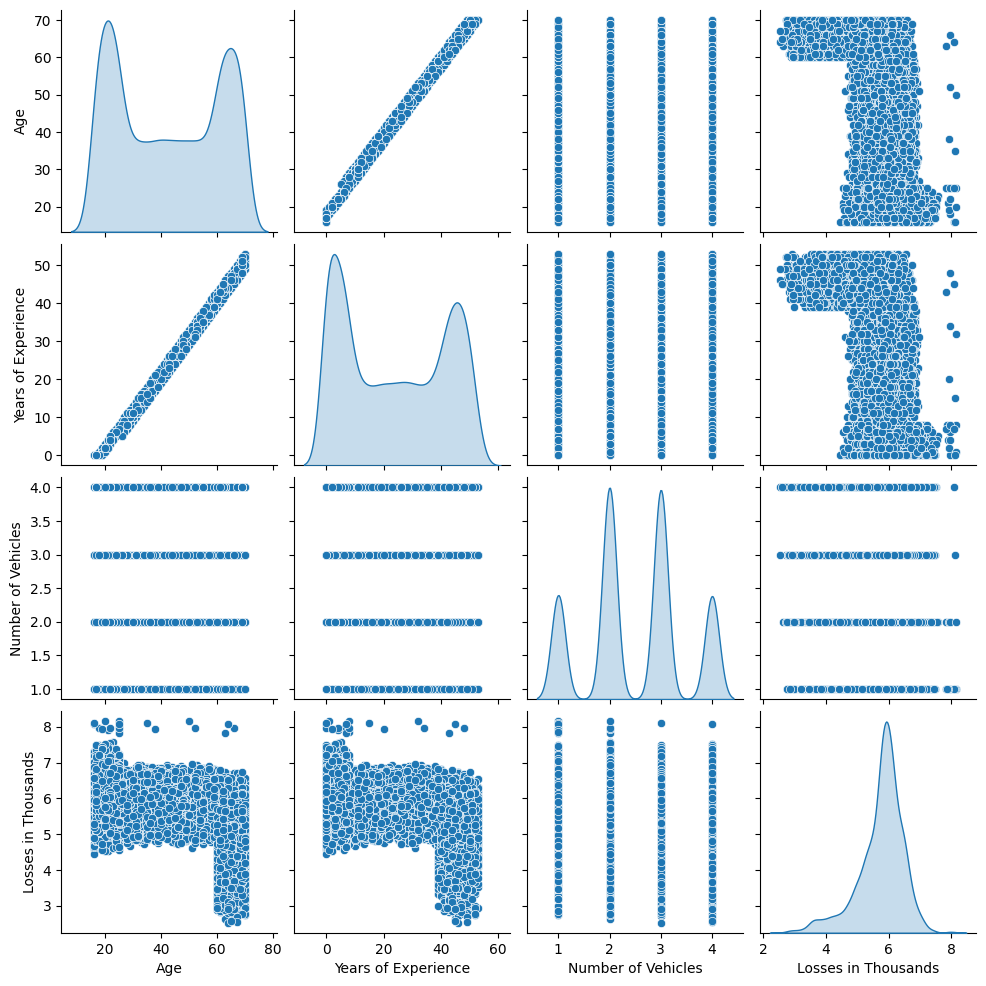

In [259]:
# Create a pairplot
sns.pairplot(data,diag_kind='kde')

# Show the plot
plt.show()

In [260]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,24,5,1,5.314779,True,False
1,31,10,1,5.996943,False,True
2,56,37,1,6.315597,True,False
3,52,31,1,5.678227,False,False
4,20,3,1,5.507527,True,True


In [261]:
data.corr()
#no column seems to be strongly correlated with the losses column.
#I doubt the data is sufficient to predict losses

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
Age,1.000000,0.997161,0.008366,-0.509823,0.005396,0.004321
Years of Experience,0.997161,1.000000,0.008545,-0.511495,0.007385,0.005029
Number of Vehicles,0.008366,0.008545,1.000000,-0.004839,-0.001155,0.009524
Losses in Thousands,-0.509823,-0.511495,-0.004839,1.000000,0.140422,0.211174
Gender_M,0.005396,0.007385,-0.001155,0.140422,1.000000,0.008002
Married_Single,0.004321,0.005029,0.009524,0.211174,0.008002,1.000000


In [262]:
#Split the data into dependent and independent variables 
x=data.drop("Losses in Thousands", axis=1)

y=data["Losses in Thousands"]



#split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [263]:
print("Intercept of the linear equation:",model.intercept_)

coefficients = model.coef_
print("The coefficients of the model are")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef}")
print()

Intercept of the linear equation: 5.853066218948185
The coefficients of the model are
Age: 0.007865174575828348
Years of Experience: -0.029086855545484517
Number of Vehicles: -0.003228492755766678
Gender_M: 0.21378391503789337
Married_Single: 0.3133393514258154



In [264]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print()
print("RMSE:",mean_squared_error(y_test,y_pred)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, y_pred))

Mean Absolute Error: 0.4511534260778982

RMSE: 0.5965781071917762

R2 Squarred: 0.33182355678770625


In [265]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

x_train['Gender_M'] = x_train['Gender_M'].astype(int)
x_train['Married_Single'] = x_train['Married_Single'].astype(int)
print(x_train.head())

       Age  Years of Experience  Number of Vehicles  Gender_M  Married_Single
10947   60                   41                   3         0               0
2031    27                   10                   1         0               1
2989    65                   44                   2         1               1
3879    57                   39                   2         1               1
3877    25                    6                   2         0               0


In [266]:





#to get p-values for each variable
x2=sm.add_constant(x_train)
#this is because the sm.OLD does not add an intercept by default to th emodel, so we manually add it
model2=sm.OLS(y_train, x2).fit()
print("p-values for each column:\n")
print(model2.pvalues)

p-values for each column:

const                   0.000000e+00
Age                     6.331324e-02
Years of Experience     2.064507e-11
Number of Vehicles      5.988328e-01
Gender_M                1.243818e-73
Married_Single         2.315092e-153
dtype: float64


In [267]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Losses in Thousands   R-squared:                       0.326
Model:                             OLS   Adj. R-squared:                  0.326
Method:                  Least Squares   F-statistic:                     1034.
Date:                 Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                         15:10:32   Log-Likelihood:                -9791.5
No. Observations:                10703   AIC:                         1.959e+04
Df Residuals:                    10697   BIC:                         1.964e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8531      0.079     73.629      0.000       5.697       6.009
Age                     0.0079      0.004      1.857      0.063      -0.000       0.016
Years of Experience    -0.0291      0.004     -6.709      0.000      -0.038      -0.021
Number of Vehicles     -0.0032      0.006     -0.526      0.599      -0.015       0.009
Gender_M                0.2138      0.012     18.293      0.000       0.191       0.237
Married_Single          0.3133      0.012     26.816      0.000       0.290       0.336
==============================================================================
Omnibus:                     1198.447   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1889.101
Skew:                          -0.808   Prob(JB):                         0.00
Kurtosis:                       4.275   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Years of experiene and Number of vehicles seem to have low t values and high p values. For years of experience, it is likely because of its high correlation with Agem so it may be a good idea to drop the column.

YOu can also visualise the performance of a midel as done below.

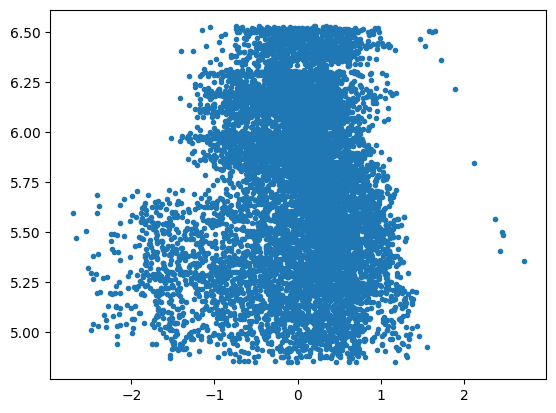

In [273]:
plt.scatter(model2.resid, model2.predict(),marker='.') # Plot between residual(actual - predicted)on the x and predicted values on y
plt.show()

The hope is that the error (residuals) is minimised, that is, they remain close to zero, and the points closter around the zero mark on the x axis. But as we saw from the beginning, there are many outloers in the target variable with higher errors.

/var/folders/0k/bm6kb3px7xx85z43bxjfs_gr0000gn/T/ipykernel_13531/643603630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2.resid, hist=True, kde=True, color = 'blue', bins=50)


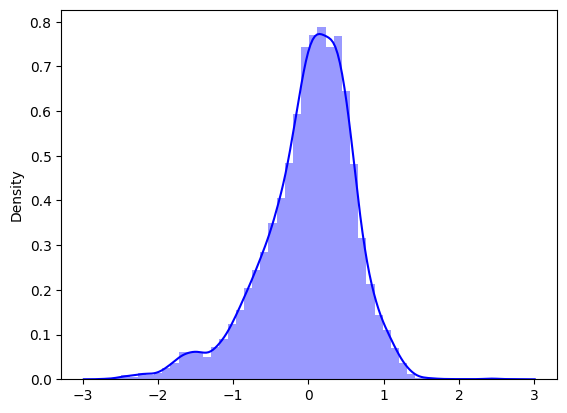

In [275]:
# error distribution
sns.distplot(model2.resid, hist=True, kde=True, color = 'blue', bins=50)
plt.show()

In [276]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [277]:
# training Score
regression_model.score(x_train, y_train)

0.32587614490318095

In [278]:
#testing score
regression_model.score(x_test, y_test)

0.33182355678770625

In [279]:
#RMSE
mean_squared_error(y_test,regression_model.predict(x_test))**0.5

0.5965781071917762

Performed better in test than train, therefore the model is not over fit.

The training and test scores are R2 scores, and both for training and testing, it is not good enough 